In [1]:
import pandas as pd
import cv2
from decord import VideoReader
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt

video_path = "/mnt/upramdya/data/TL/ball_pushing/ExR1(EB)/20250714-150800-17475185.mp4"
df = pd.read_parquet("data/20250714-150800-17475185.parquet")
xy = df[["x", "y"]].values.reshape((6, -1, 2))

Text(0.5, 0, 'Frame')

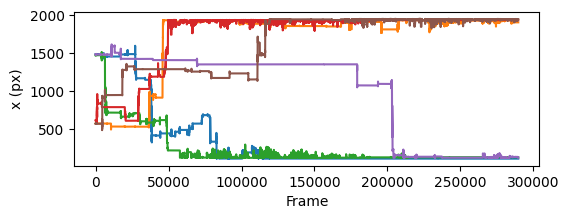

In [2]:
fig, ax = plt.subplots(figsize=(6, 2))
ax.plot(xy[..., 0].T)
ax.set_ylabel("x (px)")
ax.set_xlabel("Frame")

In [3]:
from imageio import get_writer
with get_writer("ball.mp4", fps=30, codec="libx265", ffmpeg_log_level="quiet", output_params=["-x265-params", "log-level=quiet", "-tag:v", "hvc1"]) as writer:
    vr = VideoReader(video_path)
    for frame_id in trange(0, len(vr), 160):
        frame = vr[frame_id].asnumpy()
        for x, y in xy[:, frame_id]:
            cv2.circle(frame, (int(x), int(y)), 20, (255, 0, 0), -1)
        writer.append_data(frame)

100%|██████████| 1810/1810 [02:41<00:00, 11.19it/s]
